In [32]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from simclr.modules.transformations import TransformsSimCLR

train_dataset = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=TransformsSimCLR(size=224)
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=TransformsSimCLR(size=224)
)

Files already downloaded and verified
Files already downloaded and verified


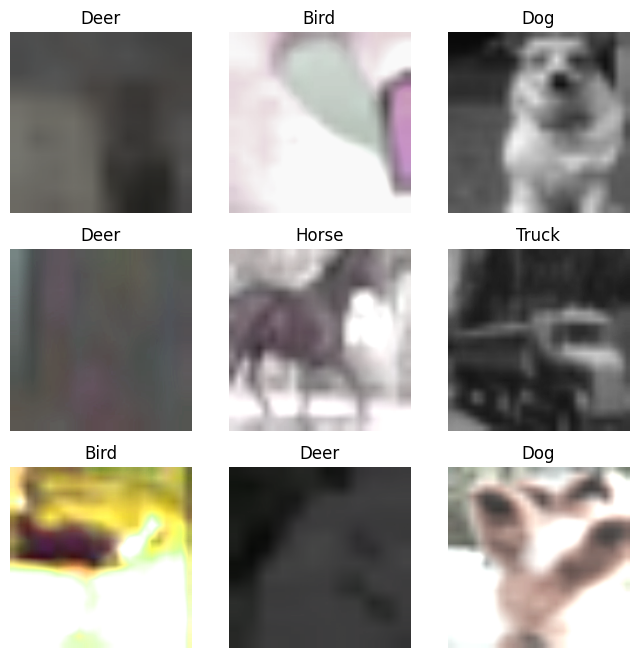

In [42]:
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]

    label_name = labels_map[label]

    figure.add_subplot(rows, cols, i)
    plt.title(label_name)
    plt.axis("off")
    
    # img가 3채널이라면 (3, 32, 32) 형태일 수 있음
    # 이미지를 (32, 32, 3)로 변환하여 색상을 제대로 표시하도록 함
    # print(img[0])
    if img[0].ndimension() == 3:  # 3채널 이미지
        plt.imshow(img[0].permute(1, 2, 0))  # (채널, 높이, 너비) -> (높이, 너비, 채널)
    else:
        # 그레이스케일 이미지일 경우 (높이, 너비)로 처리
        plt.imshow(img[0].squeeze(), cmap="gray")

plt.show()

In [23]:
train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=128,
        shuffle=True,
        drop_last=True,
        # num_workers=args.workers,
        # sampler=train_sampler,
    )


print(train_loader)
for step, ((x_i, x_j), target) in enumerate(train_loader):
    x_i = x_i.cuda(non_blocking=True)
    x_j = x_j.cuda(non_blocking=True)
    print("step : ", step ,"x_i : ", x_i.shape,"x_j : ", x_j.shape, "target : ", target.shape)

step :  0 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  1 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  2 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  3 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  4 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  5 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  6 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  7 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) target :  torch.Size([128])
step :  8 x_i :  torch.Size([128, 3, 224, 224]) x_j :  torch.Size([128, 3, 224, 224]) ta

KeyboardInterrupt: 